## MODULES FOLIUM ET PYROUTLIB

Le module **folium** permet de créer une **carte interactive** et d'y dessiner des marqueurs, des lignes brisées, des polygones, etc.

## 1) Ma première carte avec Folium

In [1]:
import folium

coords=(50.247321, 3.636668) # on définit un point géographique par ses coordonnées longitude et lattitude

# on crée une carte centrée sur ce point géographique Le Quesnoy
carte = folium.Map(location=coords, tiles='OpenStreetMap', zoom_start=15)

# on définit un nouveau point
coords = (50.248258,3.645412)
# on ajoute un marqueur correspondant à ce point sur la carte
folium.Marker(location=coords, popup = "Collège Eugène Thomas").add_to(carte)

# on définit un nouveau point
coords = (50.260473,3.631478)
# on ajoute un marqueur correspondant à ce point sur la carte
folium.Marker(location=coords, popup = "MacDo").add_to(carte)


carte

La méthode **folium.Map(location=(latitude,longitude), tiles='OpenStreetMap', zoom_start=zoom)** crée une carte centrée sur le point de coordonnées (latitude,longitude) avec un grossissement égal à zoom_start (compris entre 1 et 18). Il est possible d'utiliser plusieurs fonds de carte en initialisant le paramètre tiles avec **OpenStreetMap**, **Stamen Terrain** ou **Stamen Toner**.

La méthode **Marker()** place un marqueur sur la carte au point de coordonnées (latitude,longitude) avec une couleur (paramètre color) choisie dans la palette suivante :

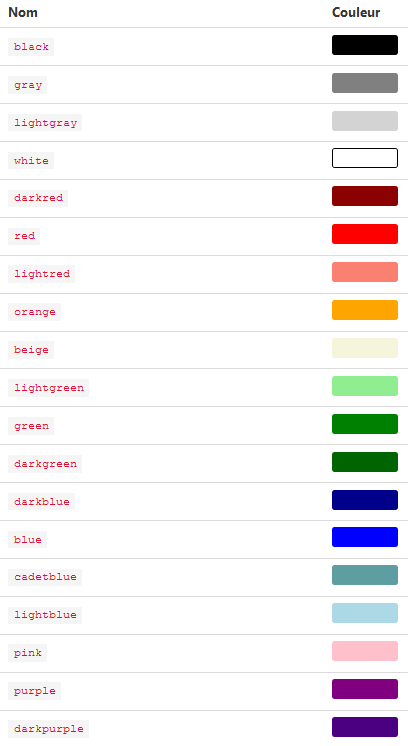


Enfin, le paramètre **popup** permet de renseigner le contenu d'une fenêtre qui s'ouvre lors du clic sur le marqueur. 

**Exercice :** Modifier le programme ci-dessus pour afficher une carte centrée sur Valenciennes permettant d’afficher la position du Lycée de l'Escaut et de la place d'armes.

In [2]:
import folium

coords = [45.832622, 6.865175]

carte = folium.Map(location=coords, zoom_start=12, tiles='Stamen Terrain') # pour ce fond de carte, il faut choisir des coordonnées compatibles

folium.Marker(coords, popup='<b>Mont Blanc</b>', tooltip="Cliquez !").add_to(carte) # la balise b permet d'afficher en gras

carte

In [3]:
import folium

coords=(50.247321, 3.636668) # on définit un point géographique par ses coordonnées longitude et lattitude

# on crée une carte centrée sur ce point géographique Le Quesnoy
carte = folium.Map(location=coords, tiles='Stamen Toner', zoom_start=15)

# on définit un nouveau point
coords = (50.248258,3.645412)
# on ajoute un marqueur correspondant à ce point sur la carte
folium.Marker(location=coords, popup = "Collège Eugène Thomas").add_to(carte)

# on définit un nouveau point
coords = (50.260473,3.631478)
# on ajoute un marqueur correspondant à ce point sur la carte
folium.Marker(location=coords, popup = "MacDo").add_to(carte)


carte

## 2) On va un peu plus loin

In [4]:
import folium

coords=(50.247321, 3.636668) # on définit un point géographique par ses coordonnées longitude et lattitude

# on crée une carte centrée sur ce point géographique Le Quesnoy
carte = folium.Map(location=coords, tiles='OpenStreetMap', zoom_start=15)

# on définit un nouveau point
coords = (50.248258,3.645412)
# on ajoute un marqueur correspondant à ce point sur la carte
folium.Marker(location=coords, popup = "Collège Eugène Thomas", icon=folium.Icon(color='green')).add_to(carte)

# on définit un nouveau point
coords = (50.260473,3.631478)
# on ajoute un marqueur correspondant à ce point sur la carte
folium.Marker(location=coords, popup = "MacDo", icon=folium.Icon(color='orange')).add_to(carte)

# Ajout d'une ligne brisée définie à partir de 5 points
points = [
  (50.248258, 3.645412),
  (50.249328, 3.646935),
  (50.252895, 3.636751),
  (50.260327, 3.633479),
  (50.260473, 3.631478),
  ]
folium.PolyLine(points, color='blue', weight=2.5, opacity=0.8).add_to(carte)

carte

La méthode **PolyLine()** dessine une ligne brisée à partir d'une liste de couples de coordonnées. 

**Exercice :** Modifier le programme ci-dessus pour afficher une ligne brisée qui matérialise le trajet entre le lycée de l'Escaut de Valenciennes et la gare.

## 3) Calculs d'itinéraires avec Pyroutelib
La bibliothèque **Pyroutelib** propose des "outils" pour calculer des itinéraires à partir des données d'Open Street Map.

In [5]:
from pyroutelib3 import Router

router = Router("car") # le moyen de locomotion choisi est la voiture, foot pour à pied, cycle, horse, tram, train
depart = router.findNode(50.248258,3.645412) # on définit le point de départ 
arrivee = router.findNode(50.260473,3.631478) # et le point d'arrivée
status, route = router.doRoute(depart, arrivee) # permet d'effectuer le calcul de l'itinéraire
if status == 'success':
	routeLatLons = list(map(router.nodeLatLon, route)) # La variable "routeLatLons" contient la liste des coordonnées des points de cheminement
			
print(routeLatLons)

Error: Traceback (most recent call last):
  File "/lib/python3.8/site-packages/basthon/packages.py", line 188, in callback
    _patch_modules.patch(packages)
  File "/lib/python3.8/site-packages/basthon/_patch_modules.py", line 426, in patch
    patch_func()
  File "/lib/python3.8/site-packages/basthon/_patch_modules.py", line 372, in patch_pyroutelib3
    import pyroutelib3.datastore as ds
  File "/lib/python3.8/site-packages/pyroutelib3/__init__.py", line 41, in <module>
    from .datastore import Datastore
  File "/lib/python3.8/site-packages/pyroutelib3/datastore.py", line 30, in <module>
    from osmiter import iter_from_osm
  File "/lib/python3.8/site-packages/osmiter/__init__.py", line 8, in <module>
    from .parser_pbf import iter_from_pbf_buffer
  File "/lib/python3.8/site-packages/osmiter/parser_pbf.py", line 7, in <module>
    from .pbf.fileformat_pb2 import Blob, BlobHeader
  File "/lib/python3.8/site-packages/osmiter/pbf/fileformat_pb2.py", line 7, in <module>
    from go

Avoir une liste de coordonnées, c'est déjà pas mal, mais cette liste n'est pas très exploitable telle quelle. Nous allons donc utiliser ce que nous avons déjà vu précédemment sur la création de cartes. 

In [6]:
from pyroutelib3 import Router
import folium

router = Router("car") # le moyen de locomotion choisi est la voiture, foot pour à pied, cycle, horse, tram, train
depart = router.findNode(50.248258,3.645412) # on définit le point de départ 
arrivee = router.findNode(50.260473,3.631478) # et le point d'arrivée
status, route = router.doRoute(depart, arrivee) # permet d'effectuer le calcul de l'itinéraire
if status == 'success':
	routeLatLons = list(map(router.nodeLatLon, route)) # La variable "routeLatLons" contient la liste des coordonnées des points de cheminement

carte = folium.Map(location=[50.253777, 3.636346],zoom_start=15)
for coord in routeLatLons: # la boucle "for" permet de parcourir la liste de coordonnées 
    coord=list(coord)      # (contenue dans la variable "routeLatLons")
    folium.CircleMarker(coord,radius = 2,fill=True, color='red' ).add_to(carte) # et d'ajouter un marqueur pour chaque couple de coordonnées
folium.PolyLine(routeLatLons, color="red", weight=2.5, opacity=1).add_to(carte) # on trace une ligne polygonale qui matérialise le trajet

carte # Attention, l'affichage peut être assez long

Traceback (most recent call last):
  File "<input>", line 1, in <module>
  File "/lib/python3.8/site-packages/pyroutelib3/__init__.py", line 41, in <module>
    from .datastore import Datastore
  File "/lib/python3.8/site-packages/pyroutelib3/datastore.py", line 30, in <module>
    from osmiter import iter_from_osm
  File "/lib/python3.8/site-packages/osmiter/__init__.py", line 8, in <module>
    from .parser_pbf import iter_from_pbf_buffer
  File "/lib/python3.8/site-packages/osmiter/parser_pbf.py", line 7, in <module>
    from .pbf.fileformat_pb2 import Blob, BlobHeader
  File "/lib/python3.8/site-packages/osmiter/pbf/fileformat_pb2.py", line 7, in <module>
    from google.protobuf import reflection as _reflection
  File "/lib/python3.8/site-packages/google/protobuf/reflection.py", line 51, in <module>
    from google.protobuf import message_factory
  File "/lib/python3.8/site-packages/google/protobuf/message_factory.py", line 47, in <module>
    from google.protobuf.internal import 

**Exercice :** Modifier le programme ci-dessus pour calculer l'itinéraire en voiture entre la gare de Valenciennes et la place d'armes. Même exercice avec un itinéraire à pied.